In [2]:
from skimage import io, transform

In [3]:
from os import listdir
from os.path import isfile, join
path = '/media/datasets/holidays/jpg/'
files = [f for f in listdir(path) if isfile(join(path, f))]

In [4]:
images = []
for i, f in enumerate(files):
    img = io.imread(path + f)
    img = transform.resize(img, (96, 96))
    images.append(img)
    if (i%100 == 0):
        print(str(i)+ "/" + str(len(files)-1))

/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.5/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


0/811
100/811
200/811
300/811
400/811
500/811
600/811
700/811
800/811


In [5]:
import numpy as np
images = np.array(images)

In [6]:
import inception_double_channel_color
model = inception_double_channel_color.create_model()
model.load_weights('double_channel_color_inception_95.h5')

Using TensorFlow backend.


In [7]:
model.predict(np.dstack((images[0], images[1])).reshape((1,96,96,6)))

array([[3.9491061e-07, 9.9999964e-01]], dtype=float32)

In [8]:
import matplotlib.pyplot as plt

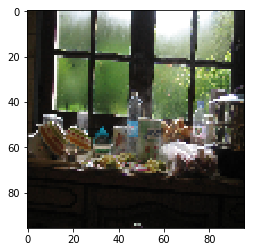

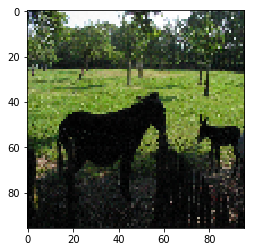

[[9.9997199e-01 2.7994467e-05]]


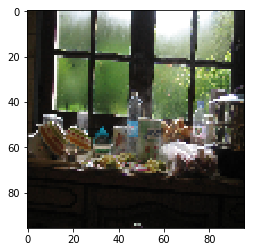

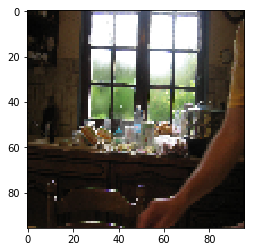

[[1.000000e+00 9.185409e-09]]


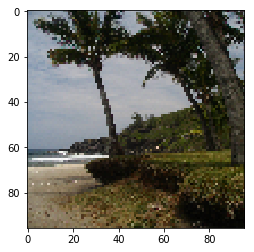

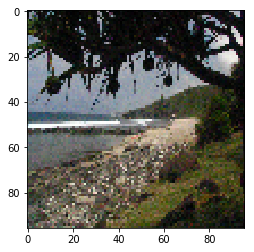

[[1.0000000e+00 1.0078759e-11]]


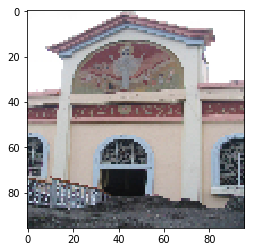

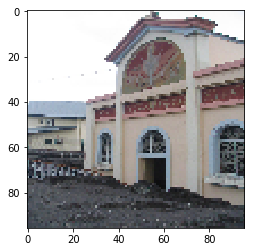

[[1.000000e+00 5.317242e-13]]


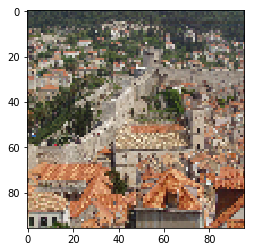

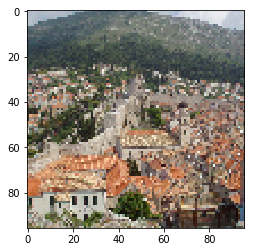

[[1.000000e+00 8.487554e-12]]


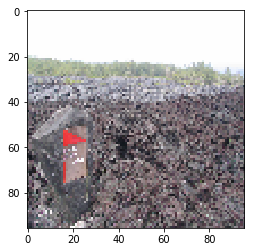

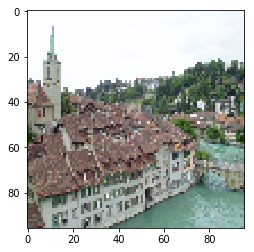

[[9.9998021e-01 1.9743426e-05]]


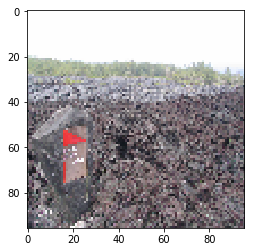

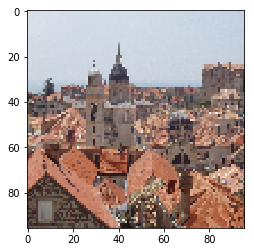

[[9.9995875e-01 4.1207681e-05]]


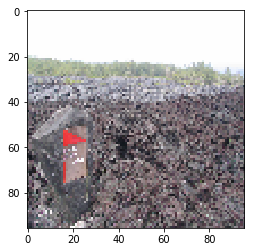

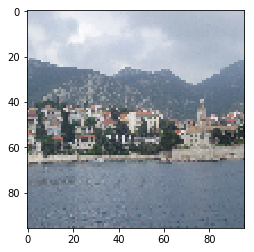

[[9.999540e-01 4.606449e-05]]


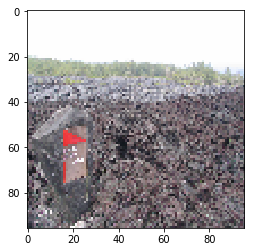

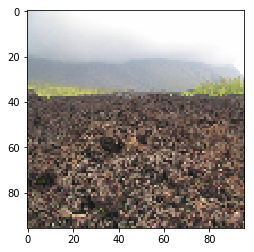

[[9.999993e-01 7.125513e-07]]


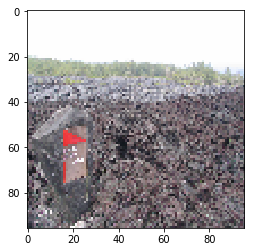

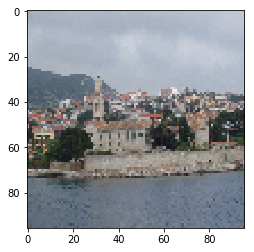

[[9.9990916e-01 9.0773479e-05]]


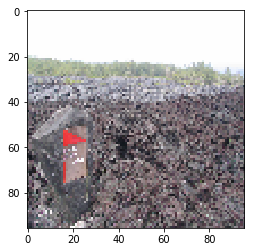

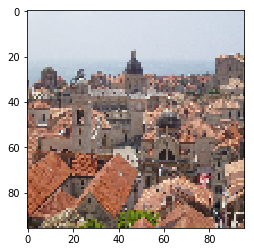

[[9.999019e-01 9.811269e-05]]


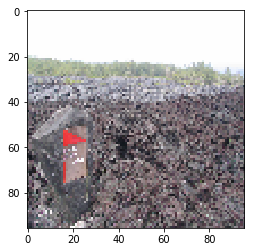

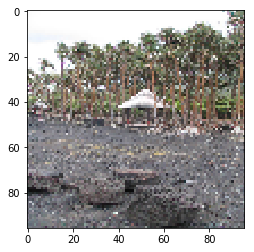

[[9.999962e-01 3.815974e-06]]


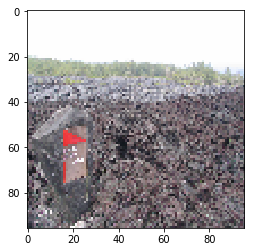

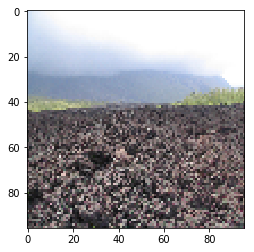

[[1.000000e+00 6.849073e-13]]


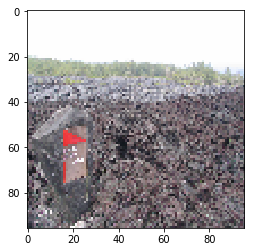

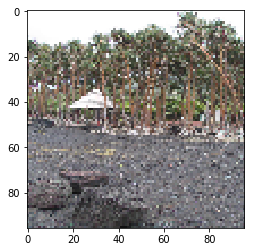

[[9.9995613e-01 4.3926644e-05]]


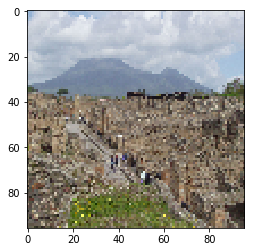

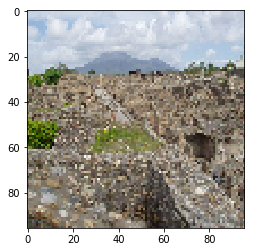

[[9.9997163e-01 2.8333603e-05]]


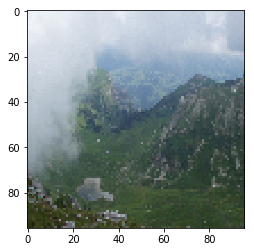

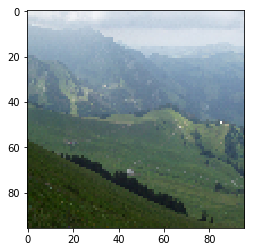

[[9.9999952e-01 4.8464887e-07]]


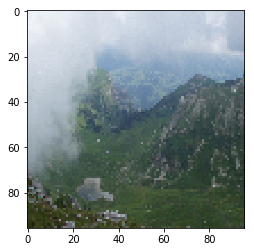

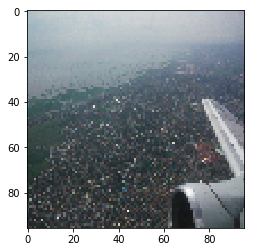

[[9.9993193e-01 6.8040012e-05]]


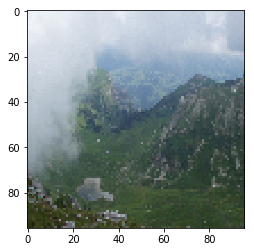

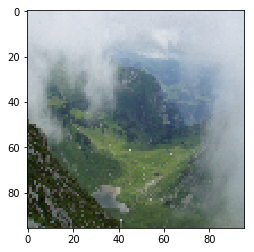

[[9.9990022e-01 9.9745994e-05]]


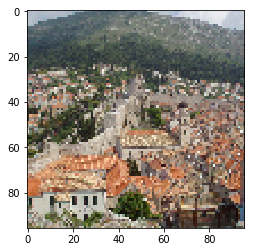

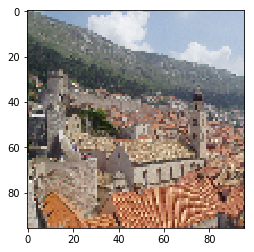

[[9.999248e-01 7.519613e-05]]


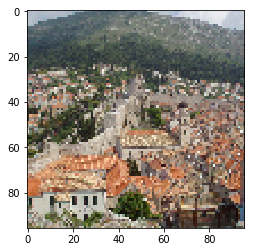

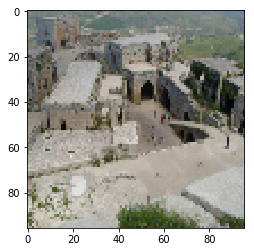

[[9.999124e-01 8.757845e-05]]


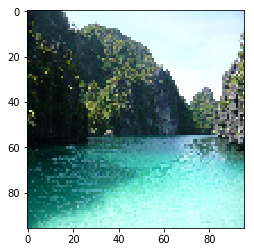

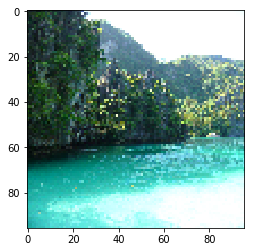

[[1.0000000e+00 1.0826077e-22]]


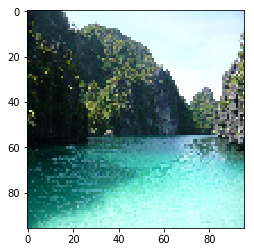

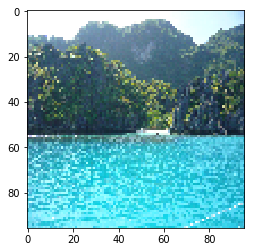

[[9.9999630e-01 3.7081902e-06]]


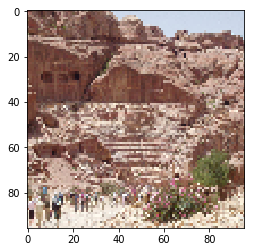

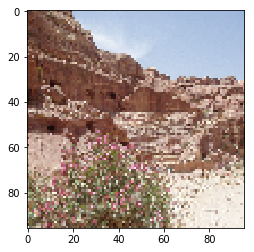

[[9.9999905e-01 9.2260757e-07]]


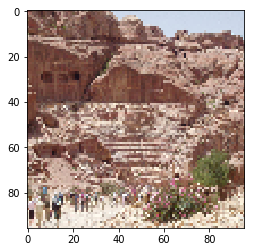

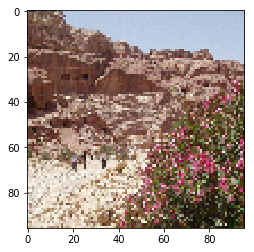

[[1.0000000e+00 1.9633552e-17]]


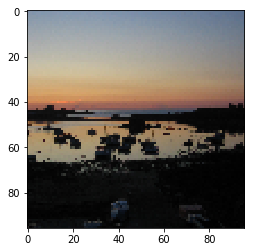

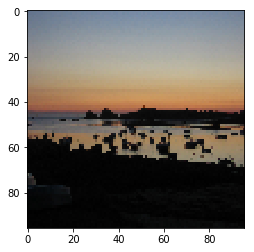

[[1.0000000e+00 2.3106278e-14]]


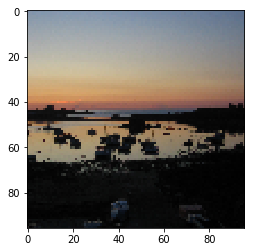

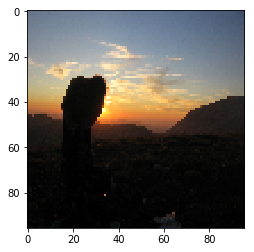

[[9.9997354e-01 2.6463222e-05]]


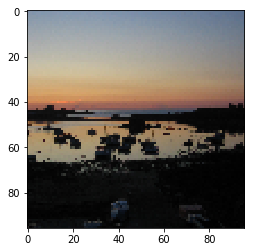

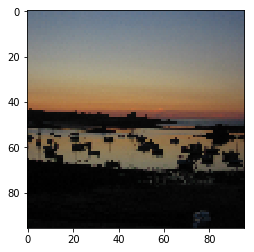

[[1.000000e+00 7.930954e-24]]


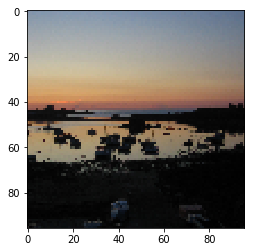

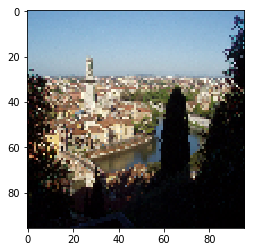

[[9.9999404e-01 5.9612075e-06]]


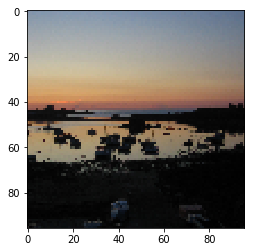

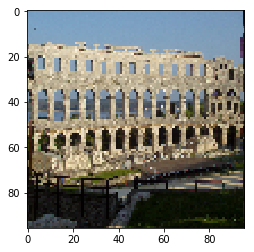

[[9.9999893e-01 1.0241348e-06]]


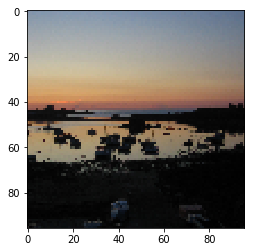

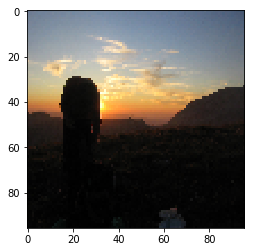

[[9.9998391e-01 1.6050173e-05]]


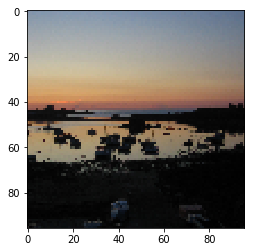

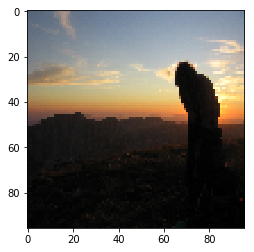

[[9.9996078e-01 3.9247854e-05]]


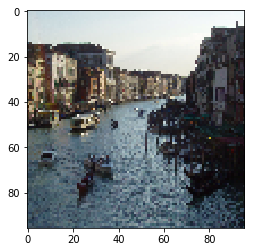

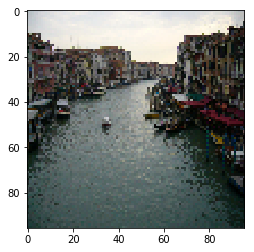

[[9.9999249e-01 7.5081866e-06]]


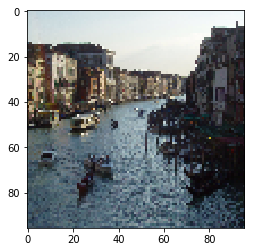

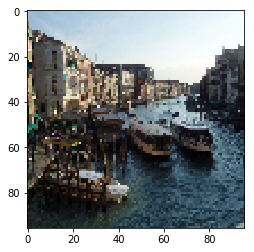

[[9.9999976e-01 2.3328478e-07]]


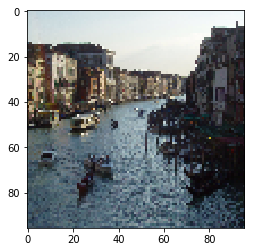

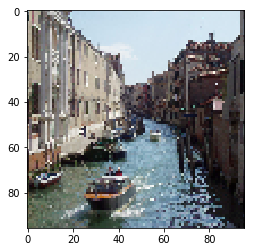

[[9.999989e-01 1.072666e-06]]


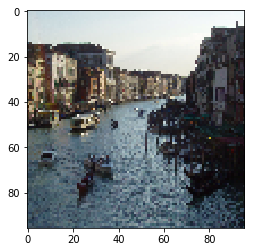

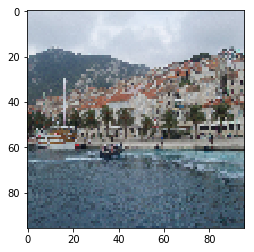

[[9.999169e-01 8.312416e-05]]


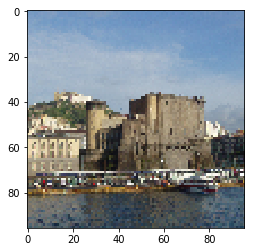

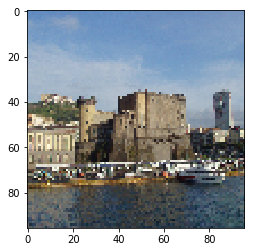

[[1.0000000e+00 4.3449633e-37]]


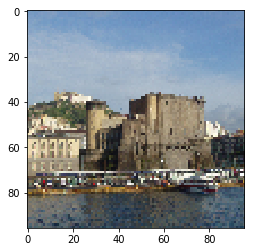

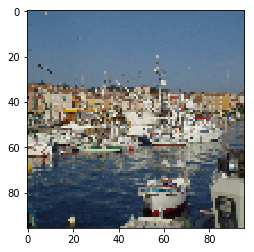

[[9.9996758e-01 3.2437885e-05]]


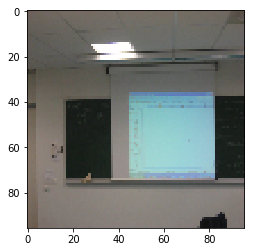

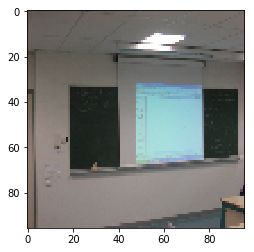

[[1.0000000e+00 1.8853756e-33]]


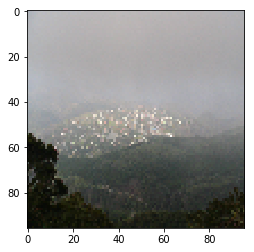

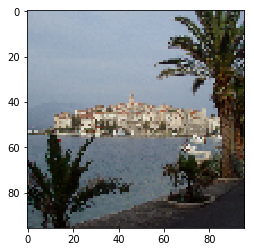

[[9.999808e-01 1.919613e-05]]


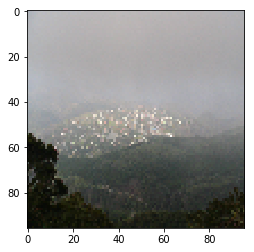

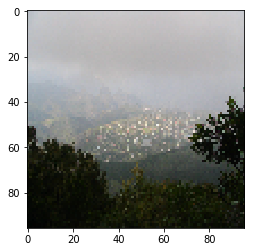

[[9.9999750e-01 2.5039983e-06]]


In [ ]:
import itertools
threshold = 0.9999
for combi in itertools.combinations(images, 2):
    prediction = model.predict(np.dstack((combi[0], combi[1])).reshape((1,96,96,6)))
    if prediction[0][0] > threshold and prediction[0][1] < 1-threshold:
        plt.imshow(combi[0])
        plt.show()
        plt.imshow(combi[1])
        plt.show()
        print(prediction)

In [1]:
import tensorflow as tf
gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)

sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
